In [2]:
# library import
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json


In [3]:
#Importing the dataframe
breast_cancer  = datasets.load_breast_cancer()

In [26]:
#This is just to chance the boolean-numerical data to their real meaning
resultado = lambda x : breast_cancer.target_names[x]

In [27]:
#Breast cancer data frame
breast_data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
breast_data['Cancer'] = breast_cancer.target
#Changing column names
breast_data.Cancer = breast_data.Cancer.apply(resultado)
breast_data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension    ...      worst texture  worst perimeter  \
0                 0.07871    ...              17.33           184.60   
1                 0.05667    ...              23.41           158.80   
2                 0.05999    ...              25.53           152.50   
3                 0.09744    ...              26.50            98.87   
4                 0.05883    ...              16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension     Cancer  
0                0.2654          0.4601                  0.11890  malignant  
1                0.1860          0.2750                  0.08902  malignant  
2                0.2430          0.3613                  0.08758  malignant  
3                0.2575          0.6638                  0.17300  malignant  
4                0.1625          0.2364                  0.07678  malignant  

[5 rows x 31 columns]

## Shaping the DataSet

In [28]:
# Dataset Description
breast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

##### Looking for empty values

In [29]:
#Check for Null values 
breast_data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Cancer                     0
dtype: int64

In [30]:
#Check for NaN values
breast_data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Cancer                     0
dtype: int64

##### Now that we know there no null nor nan values, we can tell the shape

In [31]:
bc_shape = breast_data.shape

print("The number of observatios is: ",bc_shape[0])
print("The number of columns is: ",bc_shape[1])

The number of observatios is:  569
The number of columns is:  31


##### We check what are the available columns

In [32]:
# Data columns
print('The columns to take into consideration are: \n')
for element in breast_data.columns.tolist():
    print(element)

The columns to take into consideration are: 

mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension
Cancer


In [34]:
#Varibale dist
breast_data.Cancer.value_counts()


benign       357
malignant    212
Name: Cancer, dtype: int64

##### Now, the data is not balanced, nevertheless we are going to continue working on it like this because we don't know how to equilibrate the data hehe <3

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


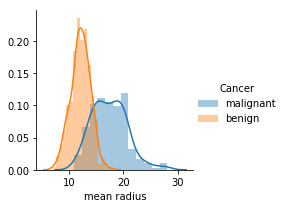

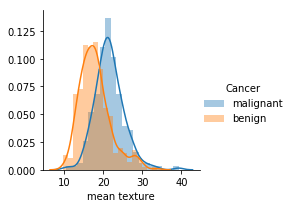

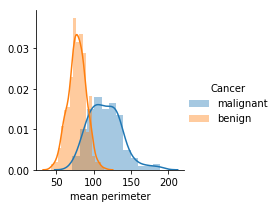

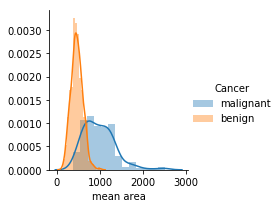

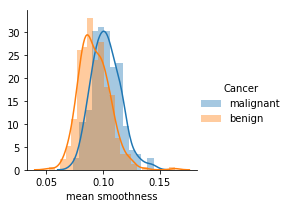

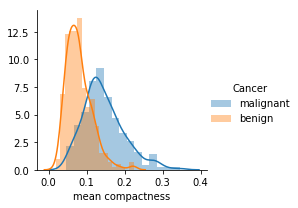

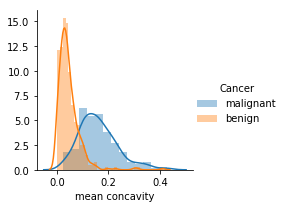

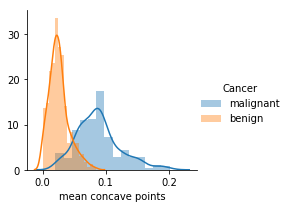

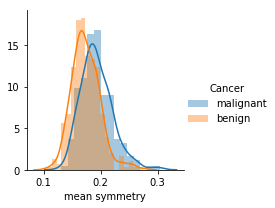

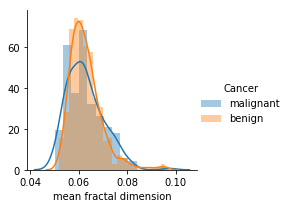

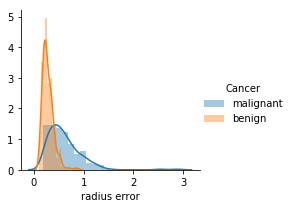

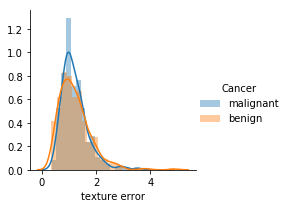

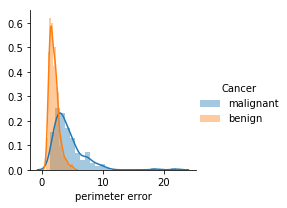

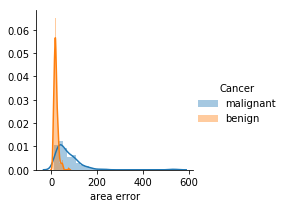

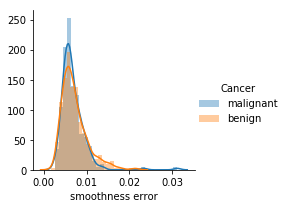

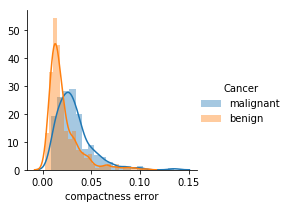

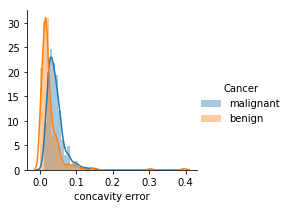

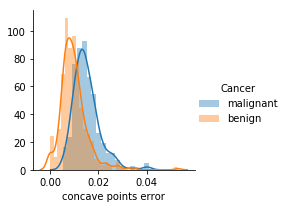

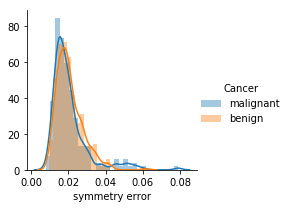

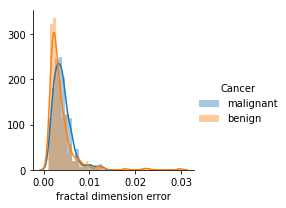

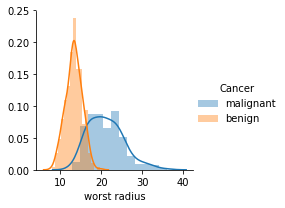

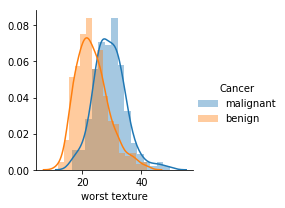

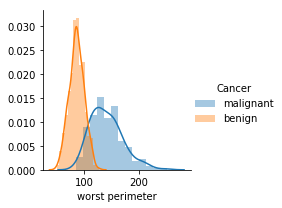

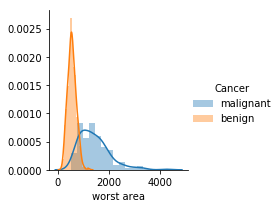

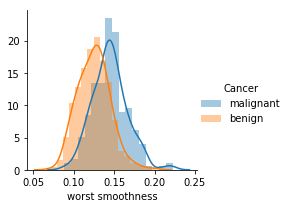

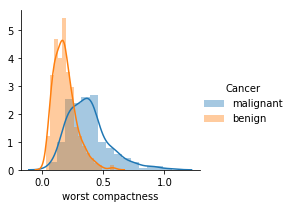

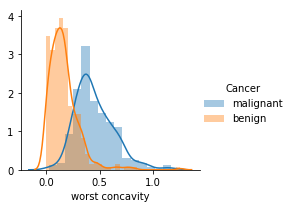

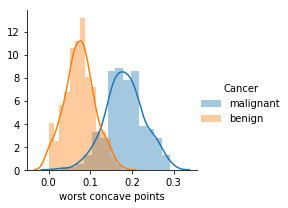

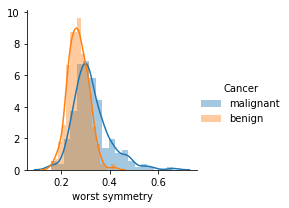

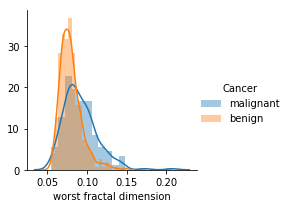

TypeError: can't multiply sequence by non-int of type 'float'

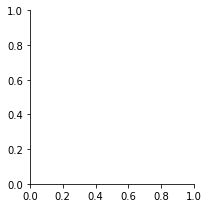

In [35]:
for columns in breast_data.columns[:len(breast_data.columns)]:
    g = sns.FacetGrid(breast_data, hue = 'Cancer')
    g = g.map(sns.distplot, columns)
    g = g.add_legend()
    plt.show()

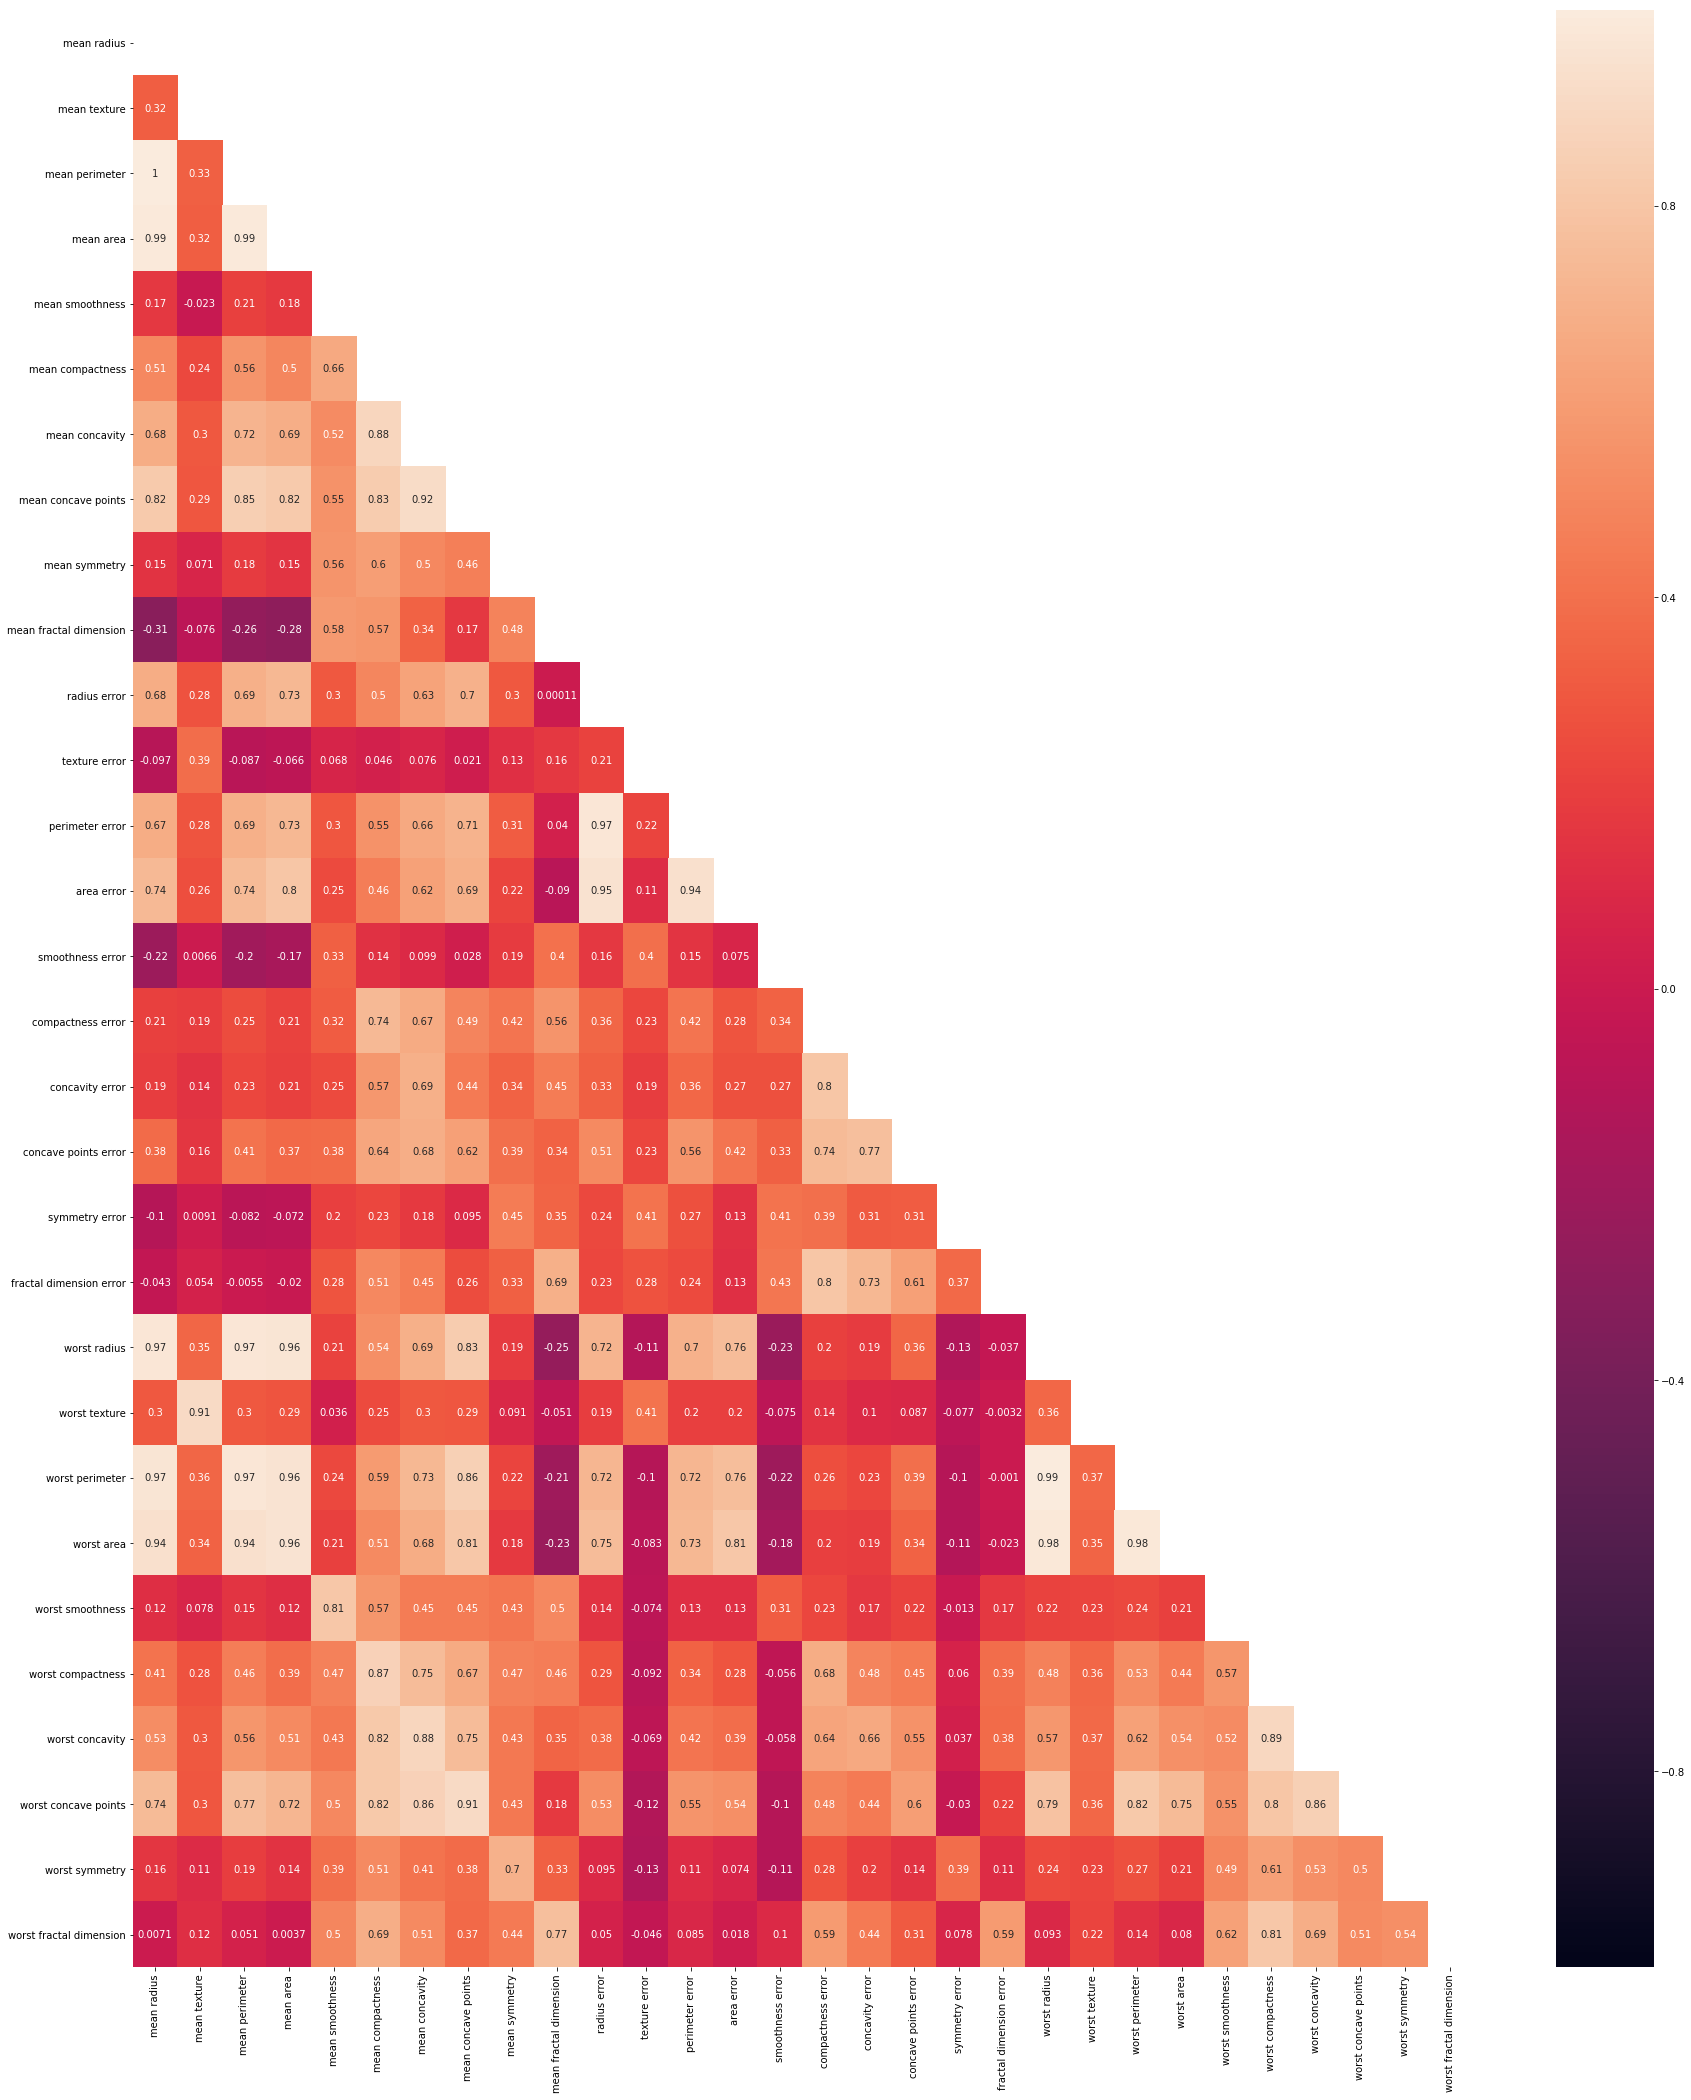

In [37]:
#Setting the size of the map
plt.rcParams['figure.figsize'] = [30,36]


# Correlation Matrix 
correlation_matrix = breast_data.corr()
plt.show()

# Heatmap
mask = np.zeros_like(correlation_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation_matrix, vmax = 1.0, vmin = -1.0, annot = True, mask=mask)
plt.show()

### Some conclusions we can get from the heatmap
Something that caugh our attention at the beggining was the super-high correlation between some specific variables, but now we've read deeply into them, they make TOTALLY SENSE. 
The most related variables are ***something_perimeter--something_area*** (where "something" stands for worst, texture.
This was pretty obvious, the higher the area, the higher the perimeter

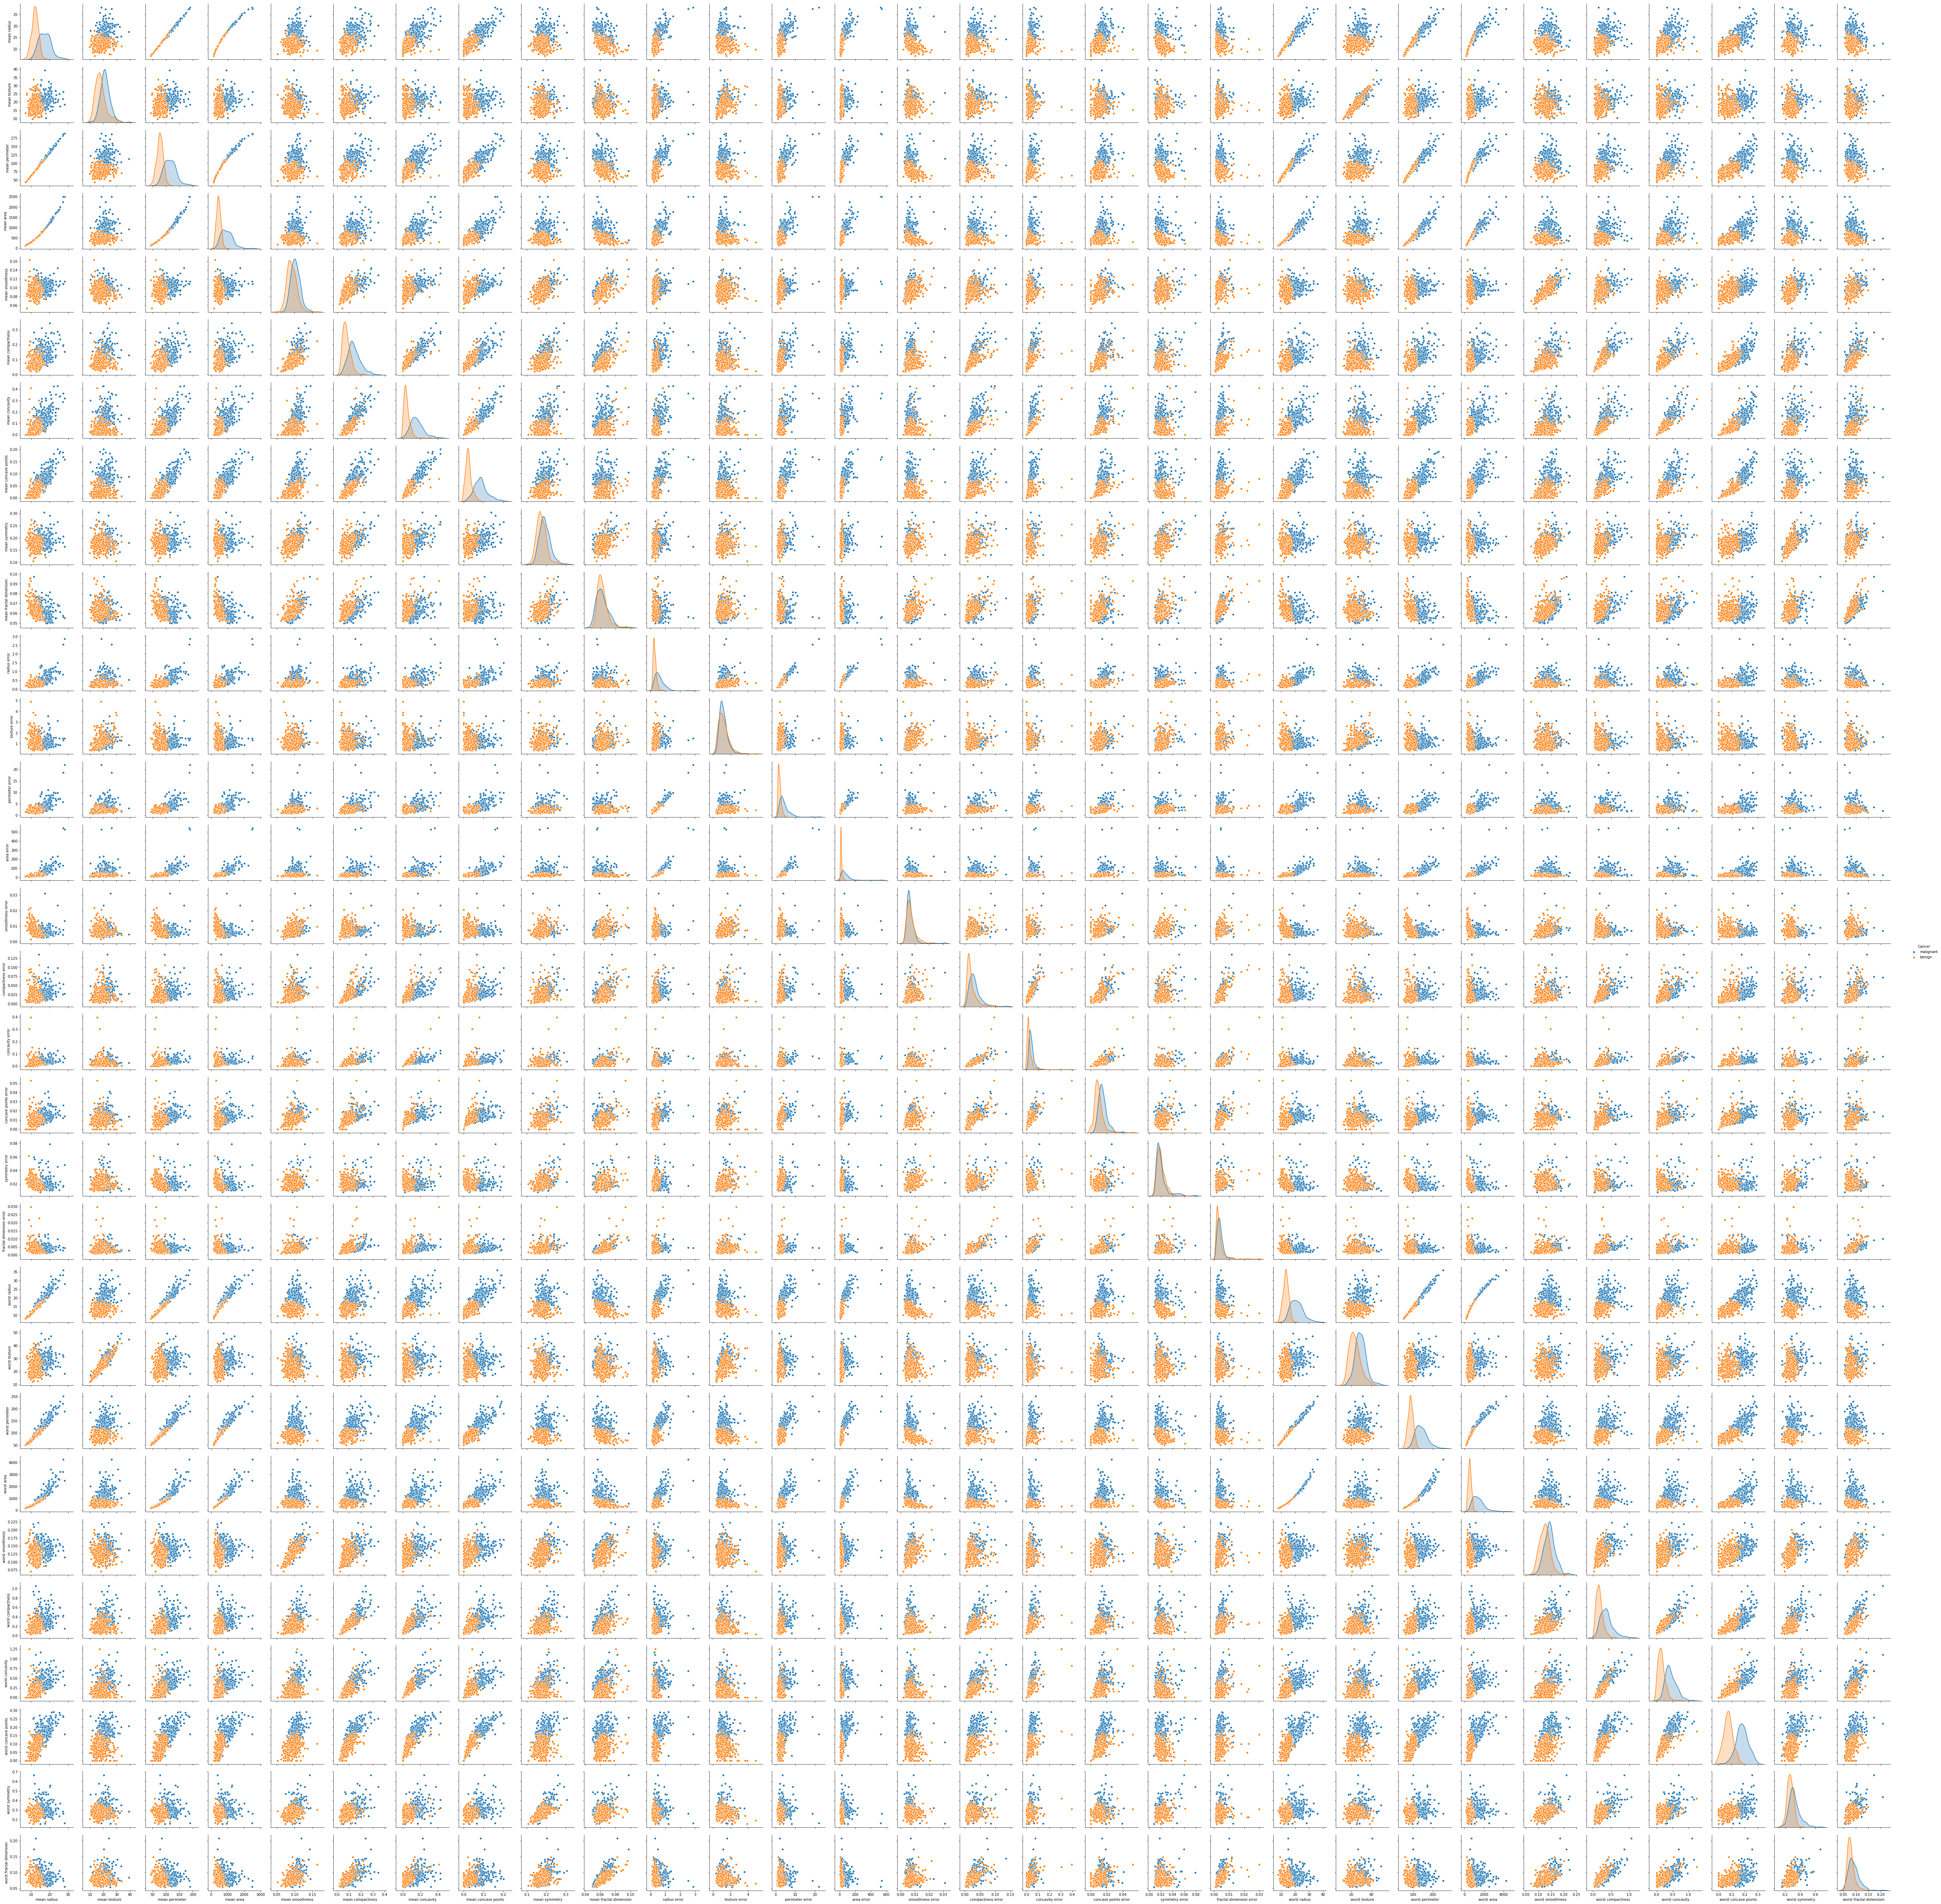

In [39]:
#Here we just do pretty much the same that we did before in the heatmap but with scatters
from pandas.plotting import scatter_matrix
g = sns.pairplot(breast_data,hue='Cancer')
plt.show()

### Here we plot some graphs we think are the most important becuase of how differentiated they are because of how good is the correlation 

In the graphs you're about to see you can easily tell the correlation would be higher, but there are some outliers

<function matplotlib.pyplot.show(*args, **kw)>

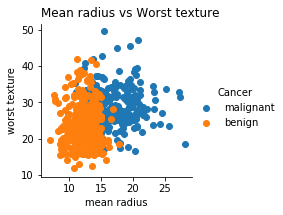

In [48]:
g = sns.FacetGrid(breast_data, hue = 'Cancer')
g = g.map(plt.scatter, 'mean radius','worst texture')
g = g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mean radius vs Worst texture')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

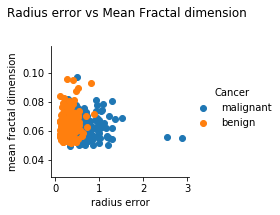

In [55]:
g = sns.FacetGrid(breast_data, hue = 'Cancer')
g = g.map(plt.scatter, 'radius error','mean fractal dimension')
g = g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Radius error vs Mean Fractal dimension')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

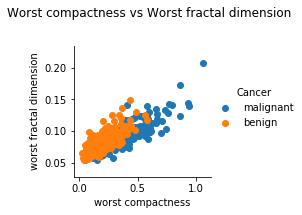

In [57]:
g = sns.FacetGrid(breast_data, hue = 'Cancer')
g = g.map(plt.scatter, 'worst compactness','worst fractal dimension')
g = g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Worst compactness vs Worst fractal dimension')
plt.show

C:\Users\Andres\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


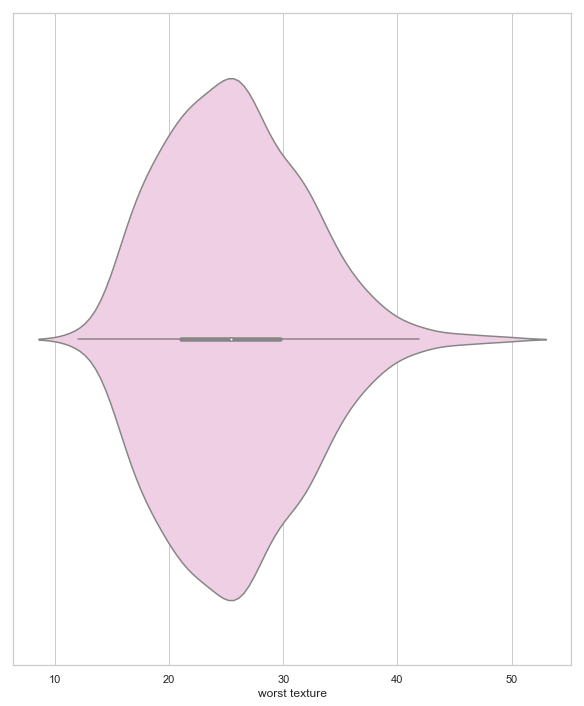

In [83]:
ax = sns.violinplot(x="worst texture",hue="Cancer", data=breast_data, palette="Pastel2_r", split=True, scale="count")

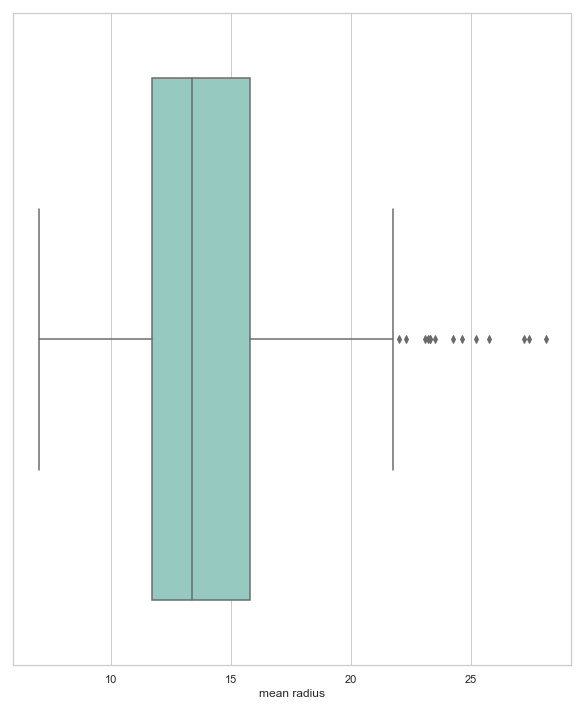